In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Loading dataset

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading Dataset and displaying first 5 rows
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
#Droping the gender with alue other
df = df[df['gender'] != 'Other']

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


<ipython-input-46-c16d6aeaeb0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


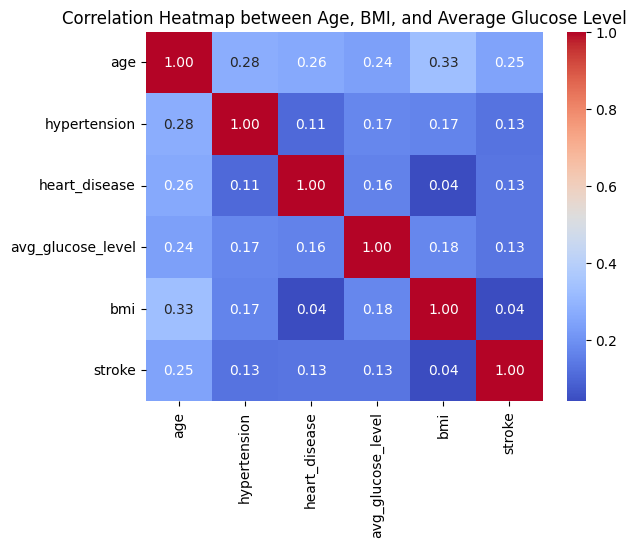

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Age, BMI, and Average Glucose Level')
plt.show()

In [ ]:
# Encoding Categorical Values using Lable encoding
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
# Encoding Categorical Values using one-hot encoding
# df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
# df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [ ]:
pip install statsmodels


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Handle BMI Missing Values
# SimpleImputer from Sklearn

# drop the missing values
df.dropna(subset=['bmi'], inplace=True)

# Lastly you can fill in the missing values with the mean/mode/median of the column
# median_bmi = df['bmi'].median()
# df['bmi'].fillna(median_bmi, inplace=True)

# #Filling missing values using simple imputer's median strategy
# imputer = SimpleImputer(strategy='median')
# df['bmi'] = imputer.fit_transform(df[['bmi']])


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data = pd.DataFrame()
# vif_data["Feature"] = df.columns
# vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# # Display the VIF DataFrame
# print(vif_data)

In [ ]:
#Advanced Strategy
X = df.drop('bmi', axis=1)
y = df['bmi']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

### Regression:
regression_model = LinearRegression()
regression_model.fit(X_imputed, y)
missing_values_indices = df[df['bmi'].isnull()].index
predicted_bmi_regression = regression_model.predict(X_imputed[missing_values_indices])
df.loc[missing_values_indices, 'bmi_regression'] = predicted_bmi_regression

### Random Forest Regressor:
rf_model = RandomForestRegressor()
rf_model.fit(X_imputed, y)
predicted_bmi_rf = rf_model.predict(X_imputed[missing_values_indices])
df.loc[missing_values_indices, 'bmi_rf'] = predicted_bmi_rf

### Boosting:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_imputed, y)
predicted_bmi_xgb = xgb_model.predict(X_imputed[missing_values_indices])
# Fit the model on non-missing values to predict missing BMI values
regression_model.fit(X_imputed[~y.isnull()], y[~y.isnull()])
df.loc[missing_values_indices, 'bmi_xgb'] = predicted_bmi_xgb


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.skew().sort_values(ascending=False)

stroke               4.532139
heart_disease        4.154536
hypertension         2.826403
avg_glucose_level    1.614619
bmi                  1.055063
gender               0.367186
Residence_type      -0.029352
smoking_status      -0.049154
age                 -0.119450
work_type           -0.302138
ever_married        -0.642160
dtype: float64

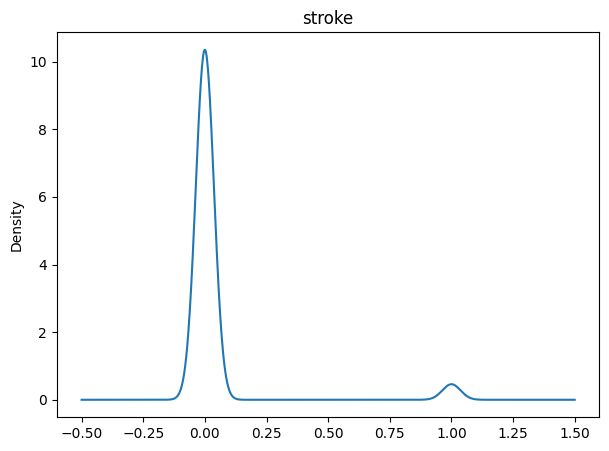

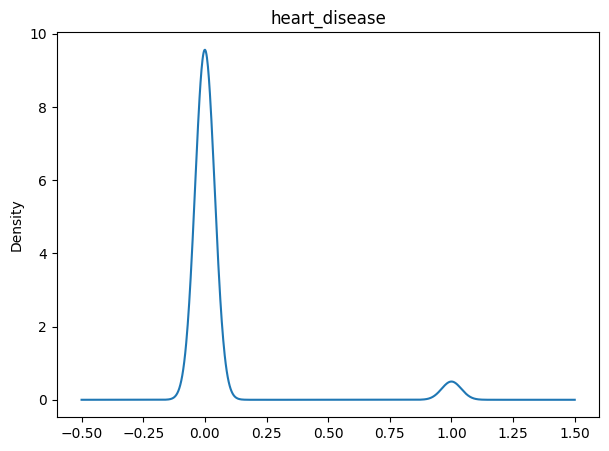

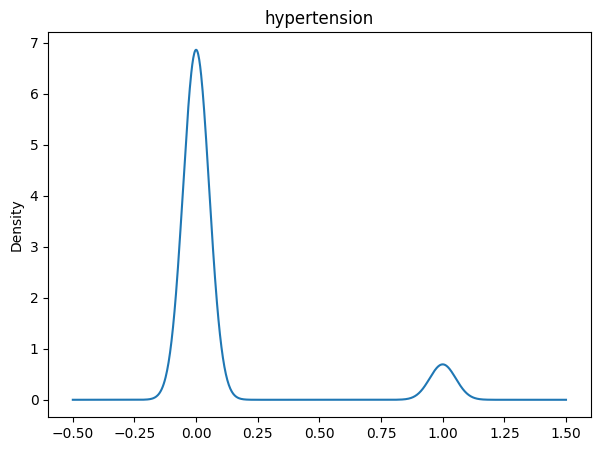

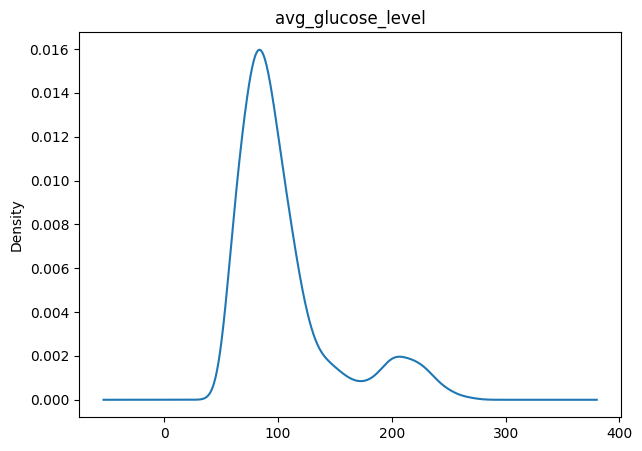

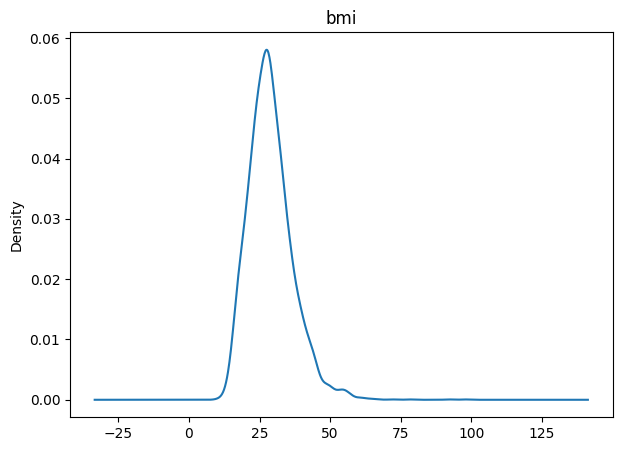

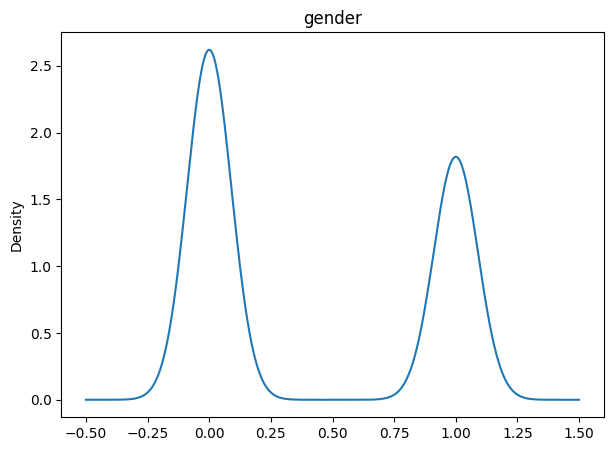

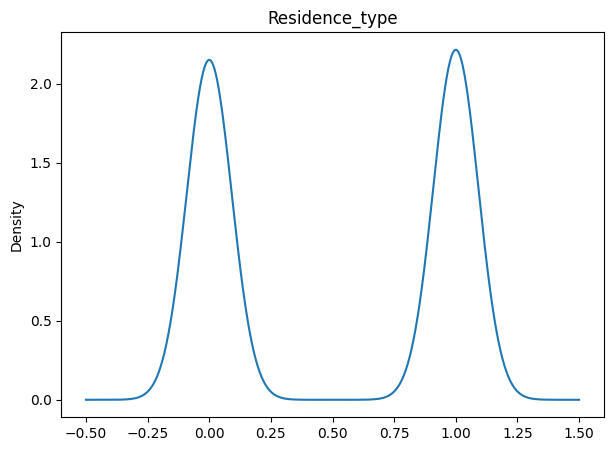

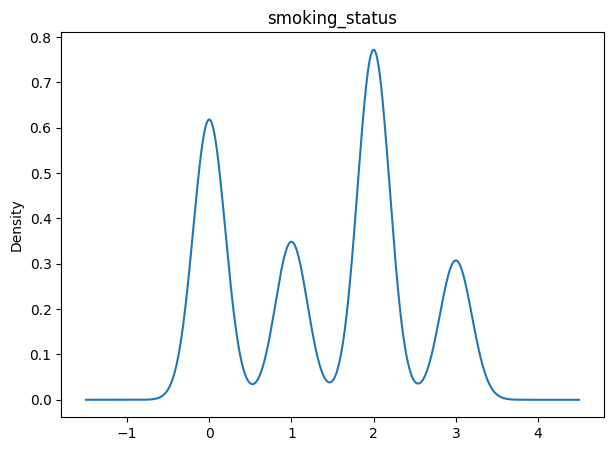

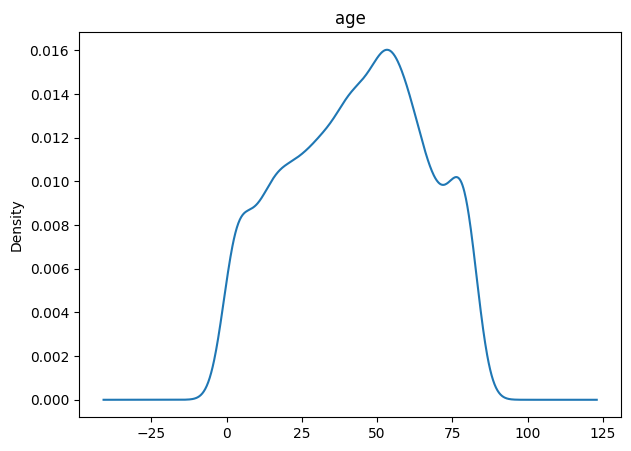

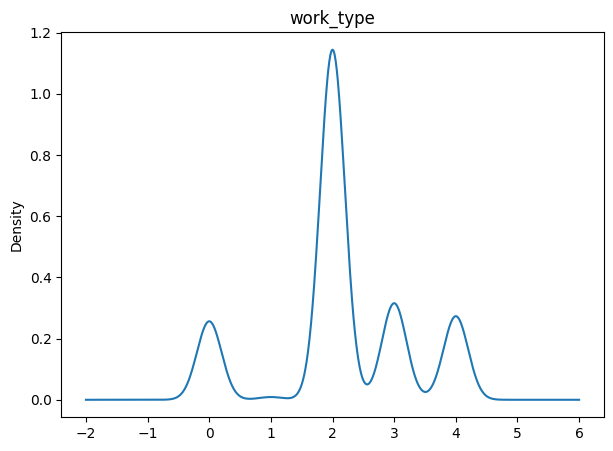

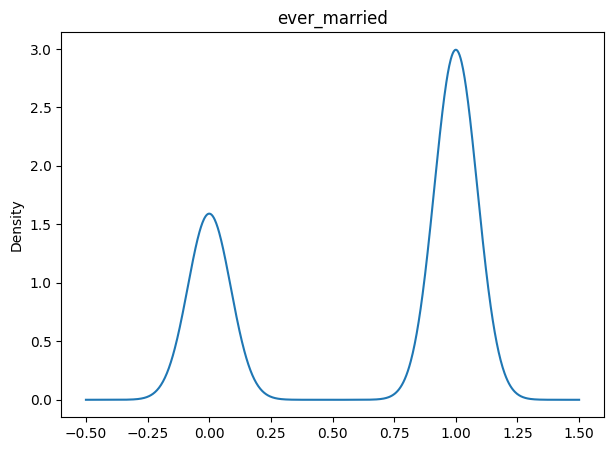

In [ ]:
## Checking Skewness
plt.figure(figsize=(7,5))
df['stroke'].plot(kind='density')
plt.title("stroke")
plt.show()

plt.figure(figsize=(7,5))
df['heart_disease'].plot(kind='density')
plt.title("heart_disease")
plt.show()

plt.figure(figsize=(7,5))
df['hypertension'].plot(kind='density')
plt.title("hypertension")
plt.show()

plt.figure(figsize=(7,5))
df['avg_glucose_level'].plot(kind='density')
plt.title("avg_glucose_level")
plt.show()

plt.figure(figsize=(7,5))
df['bmi'].plot(kind='density')
plt.title("bmi")
plt.show()

plt.figure(figsize=(7,5))
df['gender'].plot(kind='density')
plt.title("gender")
plt.show()

plt.figure(figsize=(7,5))
df['Residence_type'].plot(kind='density')
plt.title("Residence_type")
plt.show()

plt.figure(figsize=(7,5))
df['smoking_status'].plot(kind='density')
plt.title("smoking_status")
plt.show()

plt.figure(figsize=(7,5))
df['age'].plot(kind='density')
plt.title("age")
plt.show()

plt.figure(figsize=(7,5))
df['work_type'].plot(kind='density')
plt.title("work_type")
plt.show()

plt.figure(figsize=(7,5))
df['ever_married'].plot(kind='density')
plt.title("ever_married")
plt.show()


In [ ]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'avg_glucose_level',
              'bmi', 'age', 'gender', 'Residence_type', 'smoking_status' ,'work_type', 'ever_married']
# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.532139171602461
Skewness after Log Transformation: 4.532139171602462
Skewness after Square Root Transformation: 4.532139171602461
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 4.1545361240555865
Skewness after Log Transformation: 4.1545361240555865
Skewness after Square Root Transformation: 4.1545361240555865
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.8264032194982986
Skewness after Log Transformation: 2.826403219498298
Skewness after Square Root Transformation: 2.8264032194982986
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'avg_glucose_level': 1.6146189548397685
Skewness after Log Transformation: 0.9000138317309455
Skewness after Square Root Transformation: 1.267771837687568
Ske

In [ ]:
## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

In [ ]:
df.skew().sort_values(ascending=False)

stroke               4.532139
heart_disease        4.154536
hypertension         2.826403
gender               0.367186
avg_glucose_level    0.077869
bmi                 -0.000734
Residence_type      -0.029352
smoking_status      -0.049154
age                 -0.119450
work_type           -0.302138
ever_married        -0.642160
dtype: float64

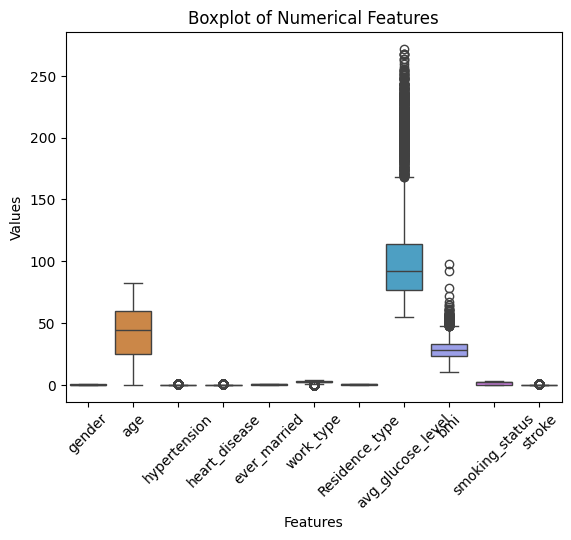

In [ ]:
#Outlier Detecting using Box plot
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
from scipy.stats import t
import numpy as np

def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) * t_critical / np.sqrt(n * (n - 2) + t_critical ** 2)
    G = np.max(np.abs(data - mean)) / std_dev
    return G, threshold, G > threshold

# Example usage:
sample_data = df
G_value, G_threshold, is_outlier = grubbs_test(sample_data)
print("Grubbs' Test Results:")
print("G Value:", G_value)
print("G Threshold:", G_threshold)
print("Is Outlier Detected:", is_outlier)

Grubbs' Test Results:
G Value: gender               1.200240
age                  1.897186
hypertension         3.143642
heart_disease        4.381499
ever_married         1.371234
work_type            1.986225
Residence_type       1.014779
avg_glucose_level    3.746933
bmi                  8.748363
smoking_status       1.522044
stroke               4.741651
dtype: float64
G Threshold: 4.417763366097762
Is Outlier Detected: gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke                True
dtype: bool


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from scipy.stats import t
import numpy as np

def dixons_q_test(data, alpha=0.05):
    n = len(data)
    sorted_data = np.sort(data)
    Q_calculated = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])
    Q_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    return Q_calculated, Q_critical, Q_calculated > Q_critical

# Example usage:
sample_data = df
Q_value, Q_critical, is_outlier = dixons_q_test(sample_data)
print("Dixon's Q Test Results:")
print("Q Value:", Q_value)
print("Q Critical:", Q_critical)
print("Is Outlier Detected:", is_outlier)

Dixon's Q Test Results:
Q Value: [        nan  1.         -0.         -0.         -0.         -0.
         inf -0.          0.39423077 -0.56521739  0.85607698]
Q Critical: 4.417765064742777
Is Outlier Detected: [False False False False False False  True False False False False]


<ipython-input-55-5b0df6e5ce49>:7: RuntimeWarning: divide by zero encountered in divide
  Q_calculated = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])
<ipython-input-55-5b0df6e5ce49>:7: RuntimeWarning: invalid value encountered in divide
  Q_calculated = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])


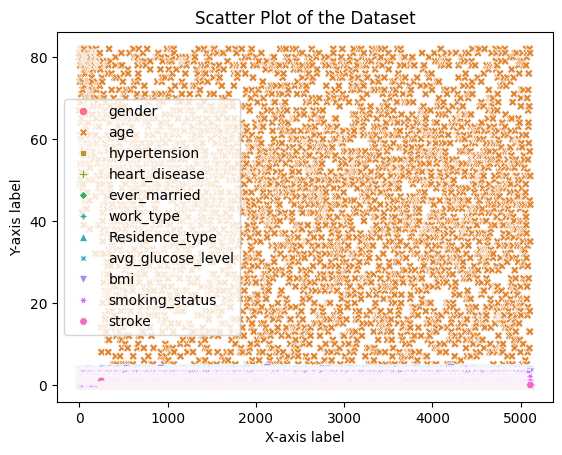

In [ ]:
import seaborn as sns

sns.scatterplot(data=df)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of the Dataset')
plt.show()

In [ ]:
from scipy import stats

# Calculate Z-score for each column
z_scores = np.abs(stats.zscore(df))

# Define threshold for Z-score
z_threshold = 3

# Find outliers based on Z-score
outliers_z = np.where(z_scores > z_threshold)

# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define threshold for IQR
iqr_threshold = 1.5

# Find outliers based on IQR
outliers_iqr = (df < (Q1 - iqr_threshold * IQR)) | (df > (Q3 + iqr_threshold * IQR))

print("Outliers detected using Z-score:")
print(outliers_z)
print("\nOutliers detected using IQR:")
print(outliers_iqr)

Outliers detected using Z-score:
(array([   0,    0,    1,    1,    2,    3,    3,    4,    5,    5,    5,
          6,    7,    8,    8,    9,    9,   10,   11,   11,   12,   12,
         13,   13,   14,   14,   15,   16,   17,   17,   18,   19,   19,
         20,   21,   22,   23,   23,   24,   24,   25,   26,   26,   27,
         27,   28,   29,   29,   29,   30,   31,   31,   32,   33,   34,
         35,   36,   36,   37,   37,   38,   38,   39,   40,   41,   41,
         42,   42,   43,   43,   44,   44,   45,   46,   46,   47,   47,
         48,   49,   49,   50,   50,   51,   52,   52,   53,   54,   55,
         56,   56,   57,   57,   58,   58,   59,   60,   61,   61,   62,
         62,   63,   64,   65,   66,   67,   67,   68,   69,   69,   70,
         70,   71,   72,   73,   73,   74,   75,   76,   76,   77,   78,
         79,   80,   80,   81,   81,   82,   83,   83,   84,   85,   86,
         86,   87,   88,   88,   89,   90,   91,   92,   92,   93,   93,
         94,   95

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination based on expected outlier percentage
iso_outliers = iso_forest.fit_predict(df)

print("Outliers detected using Isolation Forest:")
print(np.where(iso_outliers == -1))

# Local Outlier Factor (LOF) for outlier detection
lof = LocalOutlierFactor(contamination=0.1)  # Adjust contamination based on expected outlier percentage
lof_outliers = lof.fit_predict(df)

print("\nOutliers detected using Local Outlier Factor (LOF):")
print(np.where(lof_outliers == -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outliers detected using Isolation Forest:
(array([   0,    1,    3,    5,    6,    7,    8,    9,   11,   12,   13,
         14,   15,   16,   17,   18,   19,   21,   23,   24,   26,   27,
         28,   29,   30,   31,   32,   36,   37,   38,   41,   42,   43,
         44,   46,   47,   49,   50,   52,   54,   56,   57,   58,   61,
         62,   64,   65,   66,   67,   69,   70,   73,   75,   76,   78,
         79,   80,   81,   83,   84,   85,   86,   87,   88,   89,   91,
         92,   93,   94,   95,   96,   97,   98,   99,  102,  103,  104,
        107,  108,  109,  110,  111,  112,  114,  115,  116,  117,  118,
        119,  120,  121,  124,  125,  126,  128,  130,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  142,  143,  144,  145,  146,
        150,  152,  153,  156,  157,  158,  161,  164,  167,  170,  171,
        172,  174,  178,  180,  181,  182,  184,  185,  186,  187,  188,
        190,  191,  194,  195,  196,  198,  199,  200,  202,  203,  204,
        

In [ ]:
# Label selection
y = df['stroke']
X= df.drop('stroke',axis=1)

In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalising using standard scalar
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)


[[-0.83332614 -0.12939553 -0.31967136 ... -1.32388412  0.43128923
   0.5851616 ]
 [-0.83332614  0.71673334 -0.31967136 ... -0.42544845  0.6212677
  -1.29022162]
 [-0.83332614  0.49406785 -0.31967136 ...  0.24513486 -0.77745653
  -0.35253001]
 ...
 [-0.83332614 -0.35206103  3.12821263 ...  0.06600245  0.80213507
   1.52285321]
 [ 1.20001036  0.80579954 -0.31967136 ...  0.67761359  1.35535595
  -0.35253001]
 [ 1.20001036  0.89486573 -0.31967136 ... -1.96540312  0.12712421
  -0.35253001]]


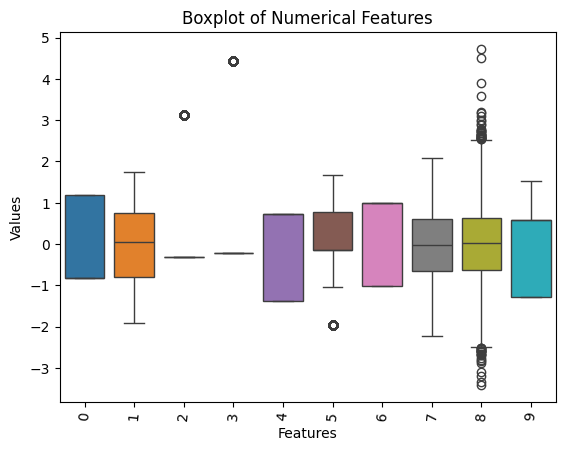

In [ ]:
sns.boxplot(data=scaled_x_train)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

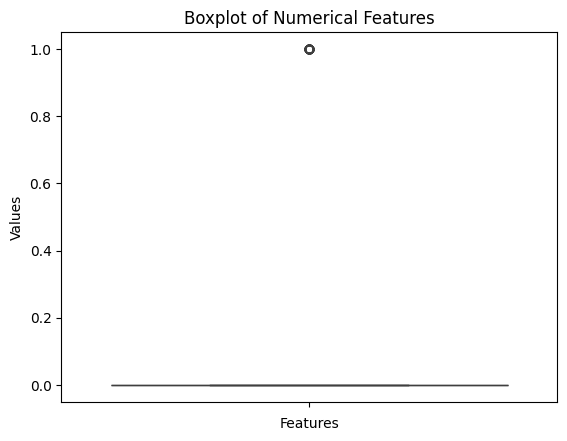

In [ ]:
sns.boxplot(data=y_test)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# PCA
pca = PCA()
scaled_x_train_pca = pca.fit_transform(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = pca.explained_variance_ratio_.cumsum()
# total_explained_variance_ratio = explained_variance_ratio.sum()
cumulative_sum_np = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
# print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")


Explained Variance Ratio:
[0.26787069 0.12378981 0.10024816 0.09425177 0.09043556 0.08744201
 0.08070787 0.06581494 0.06028969 0.0291495 ]


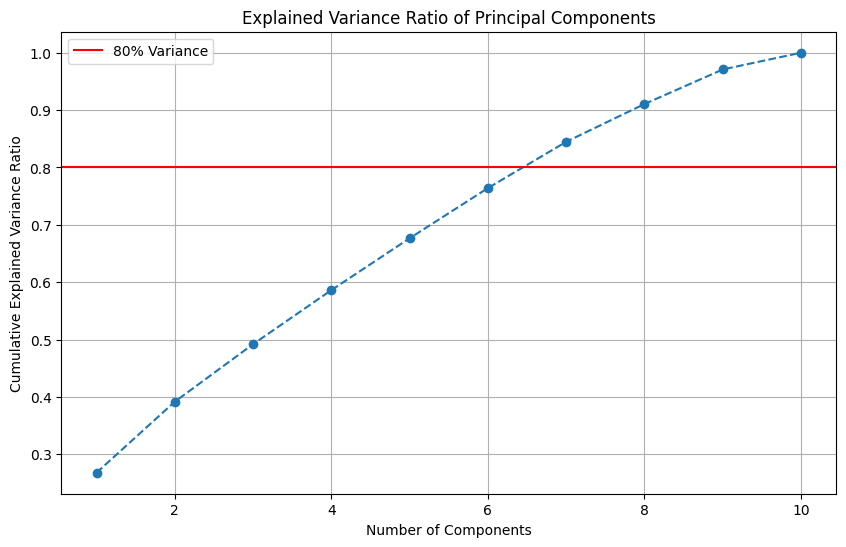

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_sum , marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Variance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pca = PCA(.90)
pca.fit(scaled_x_train)
pca.n_components_

8

In [ ]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(scaled_x_train)
X_test_pca = pca.transform(scaled_x_test)